In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1. Import Data

In [185]:
# import data from csv
df_brfss = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df_brfss.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [186]:
print(df_brfss.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [187]:
# standardizing column names
df_brfss.columns = df_brfss.columns.str.strip().str.lower().str.replace(' ','_').str.replace('-','_')

In [188]:
print(df_brfss.columns)

Index(['diabetes_binary', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')


In [189]:
print("BRFSS shape", df_brfss.shape)
print("Missing\n", df_brfss.isna().sum())

BRFSS shape (70692, 22)
Missing
 diabetes_binary         0
highbp                  0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
stroke                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
anyhealthcare           0
nodocbccost             0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
sex                     0
age                     0
education               0
income                  0
dtype: int64


In [190]:
print("Data types:\n", df_brfss.dtypes)

Data types:
 diabetes_binary         float64
highbp                  float64
highchol                float64
cholcheck               float64
bmi                     float64
smoker                  float64
stroke                  float64
heartdiseaseorattack    float64
physactivity            float64
fruits                  float64
veggies                 float64
hvyalcoholconsump       float64
anyhealthcare           float64
nodocbccost             float64
genhlth                 float64
menthlth                float64
physhlth                float64
diffwalk                float64
sex                     float64
age                     float64
education               float64
income                  float64
dtype: object


In [191]:
# distribution of classes in dataset
print(df_brfss['diabetes_binary'].value_counts())
print(df_brfss['diabetes_binary'].value_counts(normalize=True))

diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
diabetes_binary
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [192]:
df_brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diabetes_binary       70692 non-null  float64
 1   highbp                70692 non-null  float64
 2   highchol              70692 non-null  float64
 3   cholcheck             70692 non-null  float64
 4   bmi                   70692 non-null  float64
 5   smoker                70692 non-null  float64
 6   stroke                70692 non-null  float64
 7   heartdiseaseorattack  70692 non-null  float64
 8   physactivity          70692 non-null  float64
 9   fruits                70692 non-null  float64
 10  veggies               70692 non-null  float64
 11  hvyalcoholconsump     70692 non-null  float64
 12  anyhealthcare         70692 non-null  float64
 13  nodocbccost           70692 non-null  float64
 14  genhlth               70692 non-null  float64
 15  menthlth           

In [193]:
df_brfss.describe()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# H3: Does accessibility to healthcare have an impact on diabetes?
Reject

## EDA

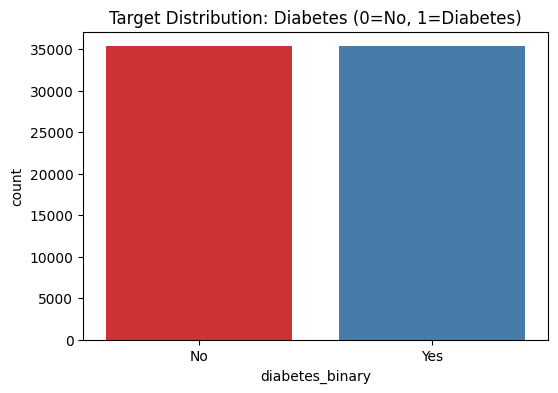

In [194]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_brfss, x="diabetes_binary", hue="diabetes_binary", palette="Set1", legend=False)
ax.set_xticks([0,1])
ax.set_xticklabels(['No','Yes'])
plt.title("Target Distribution: Diabetes (0=No, 1=Diabetes)")
plt.show()

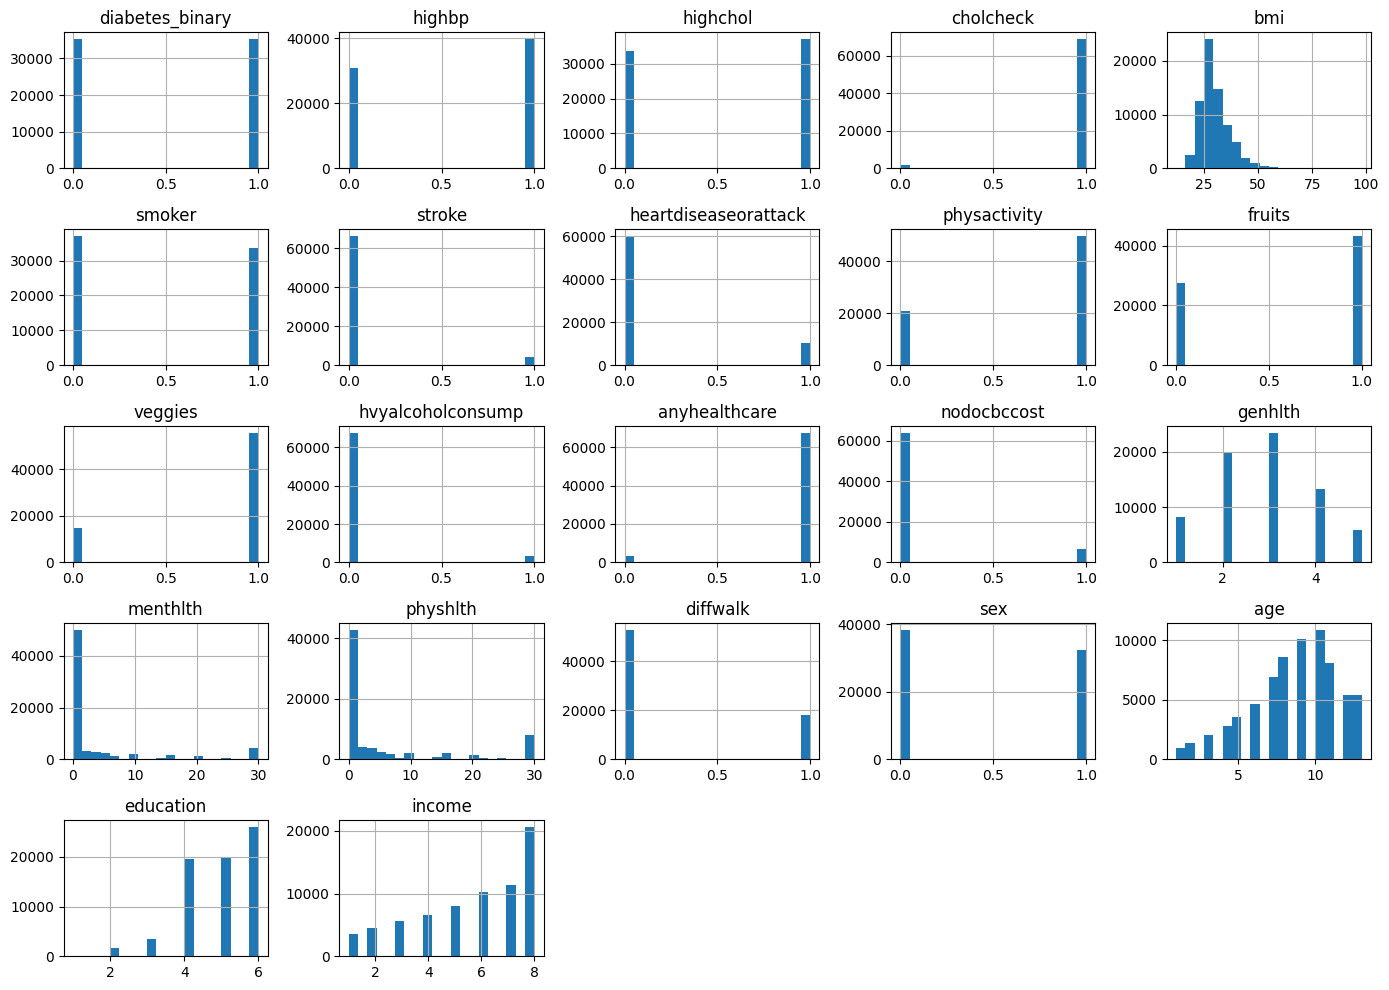

In [195]:
num_cols = df_brfss.select_dtypes(include=[np.number]).columns.tolist()

# histograms for variables
df_brfss[num_cols].hist(figsize=(14,10), bins=20)
plt.tight_layout()

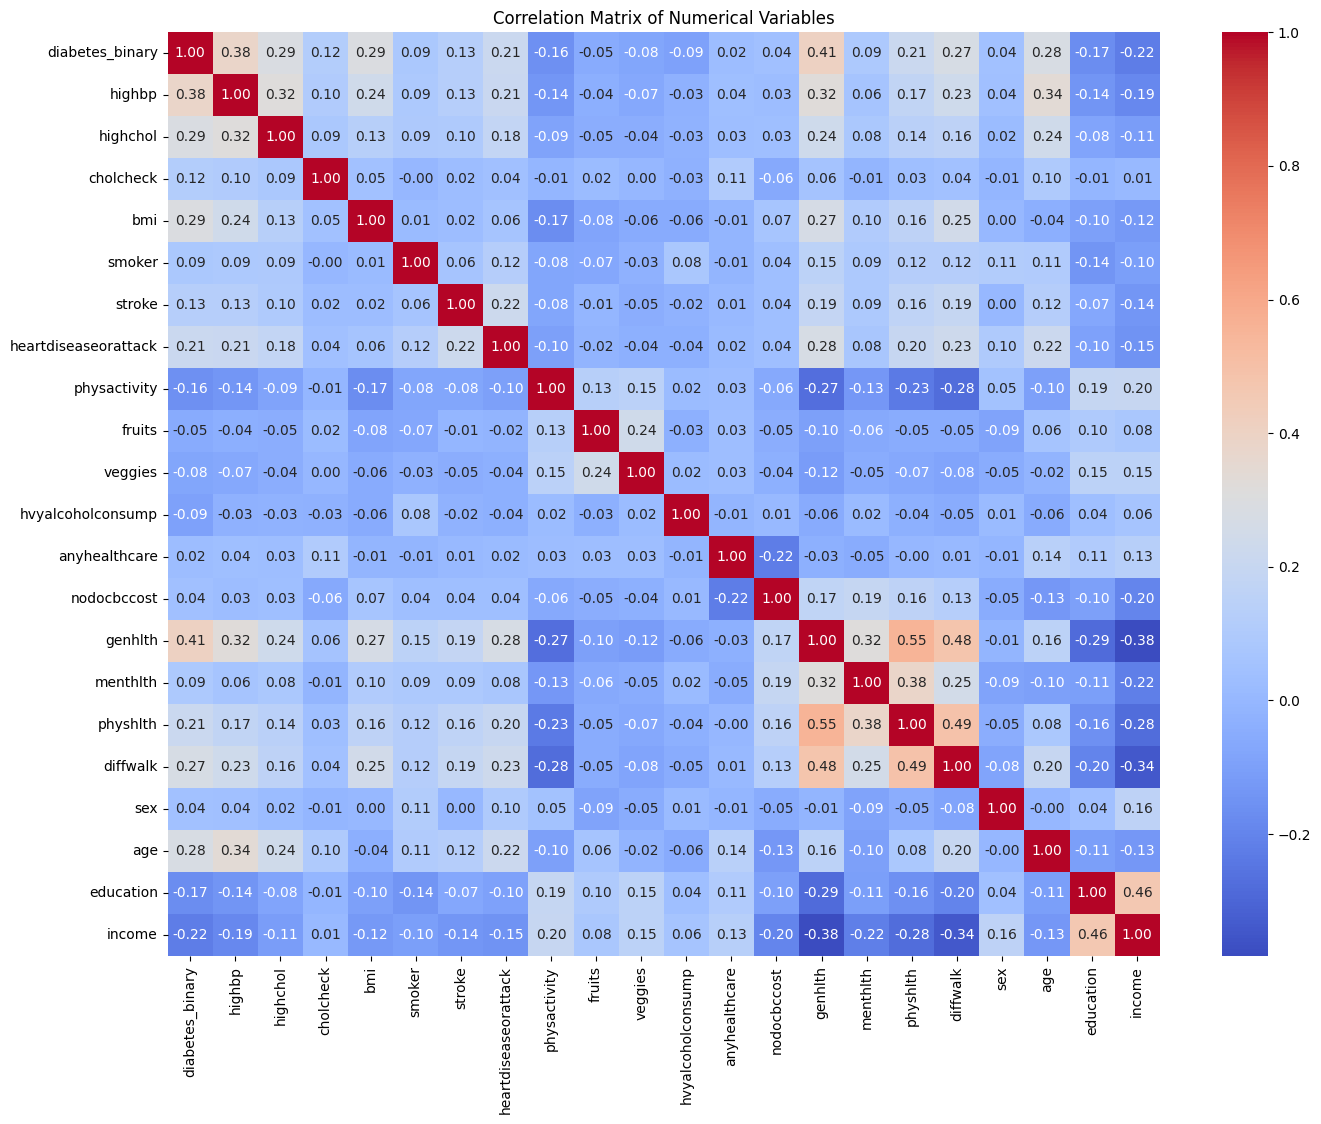

In [196]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_brfss[num_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Final Graphs

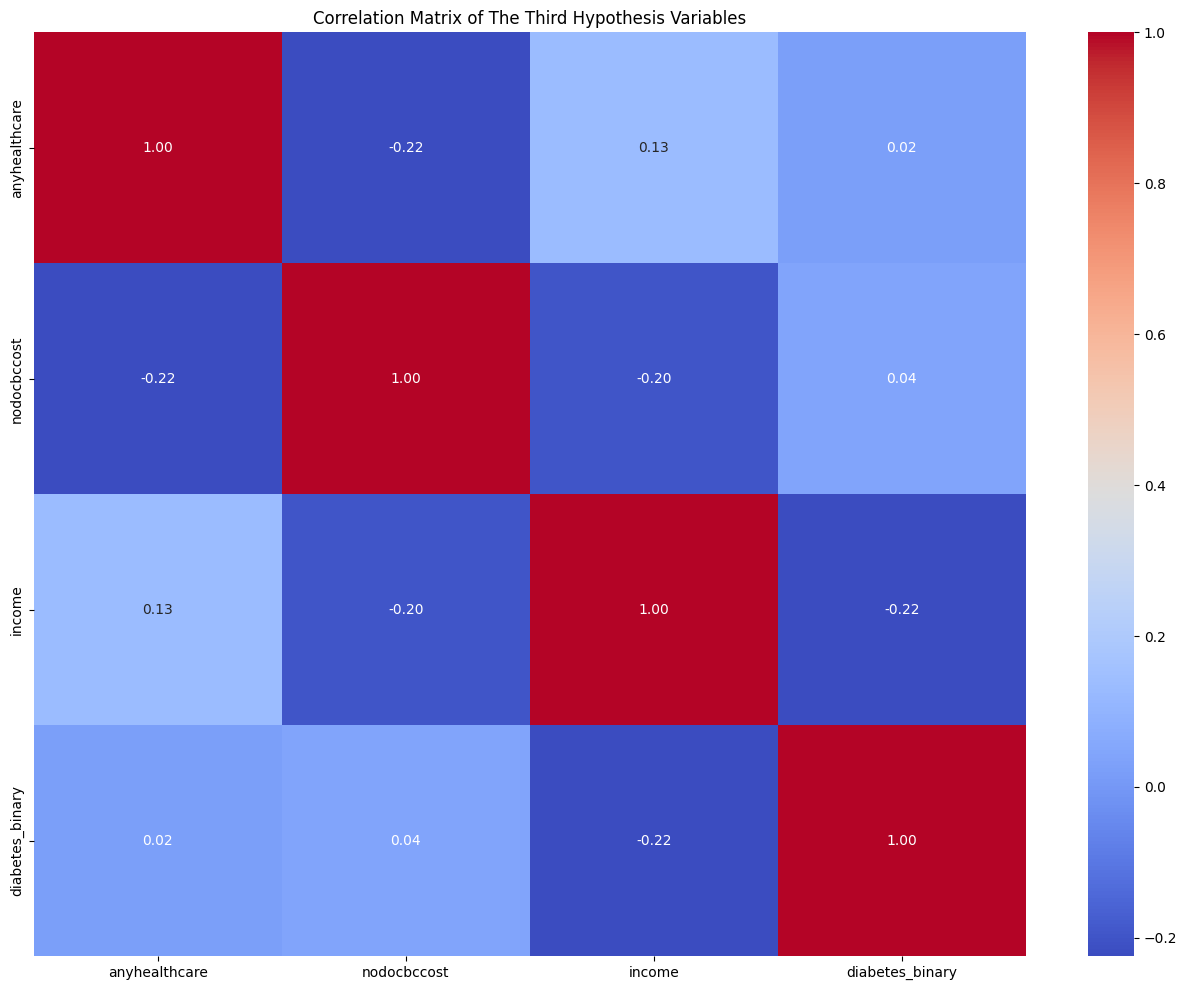

In [197]:
# The needed columns for the third hypothesis
hypo3_cols = ["anyhealthcare","nodocbccost","income","diabetes_binary"]

# Calculate the correlation matrix for the first hypothesis
correlation_matrix3 = df_brfss[hypo3_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of The Third Hypothesis Variables')
plt.show()

<Figure size 1000x600 with 0 Axes>

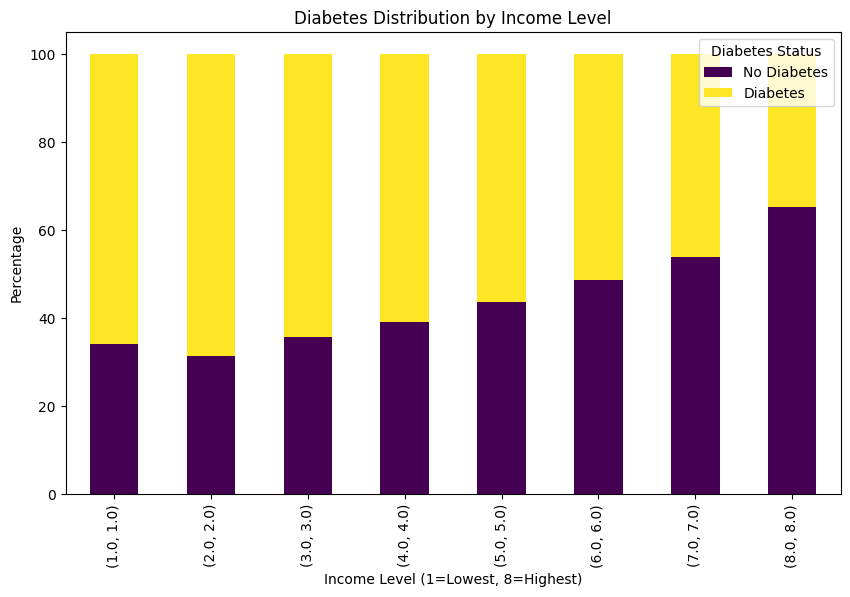

In [198]:
# Income vs Diabetes (Stacked % Bar Plot)
plt.figure(figsize=(10,6))
income_counts = (
    df_brfss.groupby(["income", "diabetes_binary"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())  # convert to %
    .unstack()
)

income_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Diabetes Distribution by Income Level")
plt.ylabel("Percentage")
plt.xlabel("Income Level (1=Lowest, 8=Highest)")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()

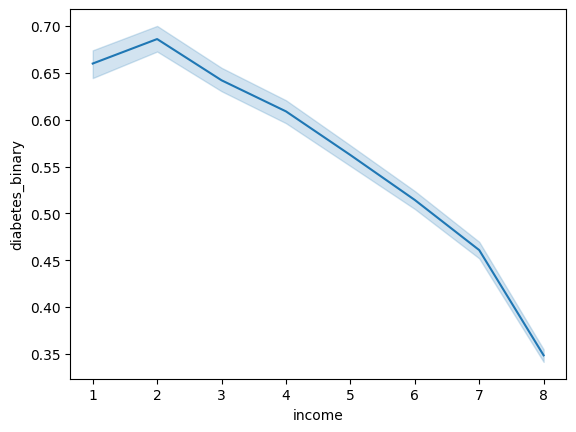

In [199]:
# Income vs Diabetes Line Plot
ax = sns.lineplot(data=df_brfss, x="income", y="diabetes_binary")


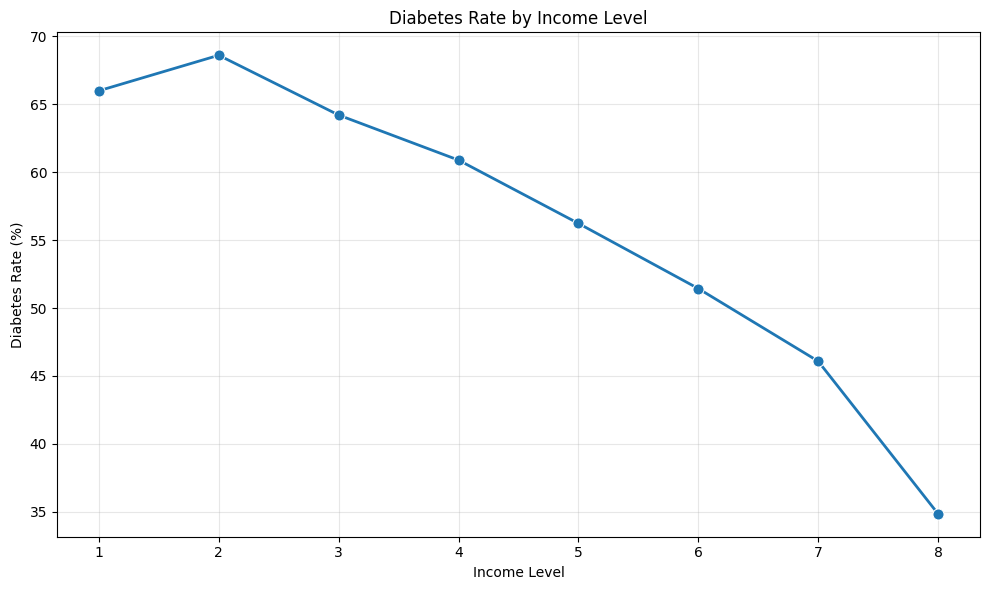

In [200]:
plt.figure(figsize=(10,6))
diabetes_rate = df_brfss.groupby("income")["diabetes_binary"].mean() * 100

ax = sns.lineplot(x=diabetes_rate.index, y=diabetes_rate.values, marker='o', linewidth=2, markersize=8)
#ax.set_xticks([1,2,3,4,5,6,7,8])
#ax.set_xticklabels(['0','10000','15000','20000','25000','35000','50000','75000'])
plt.title("Diabetes Rate by Income Level")
plt.ylabel("Diabetes Rate (%)")
plt.xlabel("Income Level")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

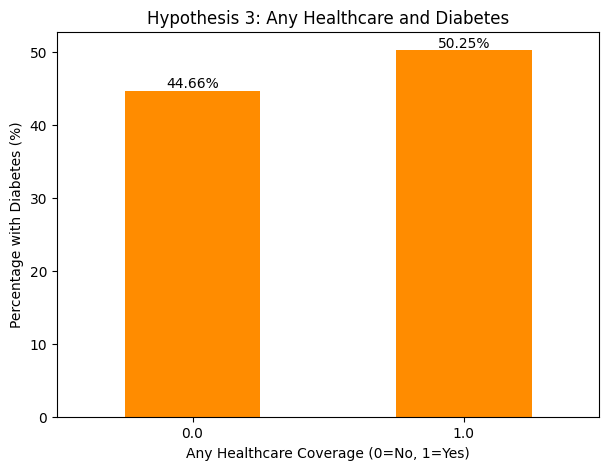

In [201]:
# H3: Insurance vs Diabetes
plt.figure(figsize=(7,5))
diabetes_rate = df_brfss.groupby('anyhealthcare')['diabetes_binary'].mean() * 100

ax = diabetes_rate.plot(kind='bar', color="darkorange")
plt.title("Hypothesis 3: Any Healthcare and Diabetes")
plt.xlabel("Any Healthcare Coverage (0=No, 1=Yes)")
plt.ylabel("Percentage with Diabetes (%)")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')


plt.show()

<Figure size 1000x600 with 0 Axes>

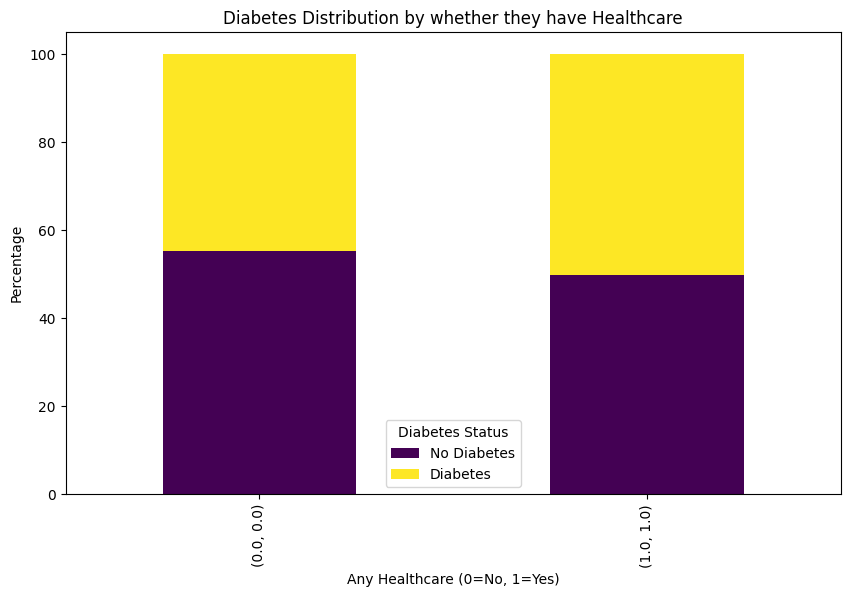

In [202]:
# AnyHealthcare vs Diabetes (Stacked % Bar Plot)
plt.figure(figsize=(10,6))
income_counts = (
    df_brfss.groupby(["anyhealthcare", "diabetes_binary"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())  # convert to %
    .unstack()
)

income_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Diabetes Distribution by whether they have Healthcare")
plt.ylabel("Percentage")
plt.xlabel("Any Healthcare (0=No, 1=Yes)")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()

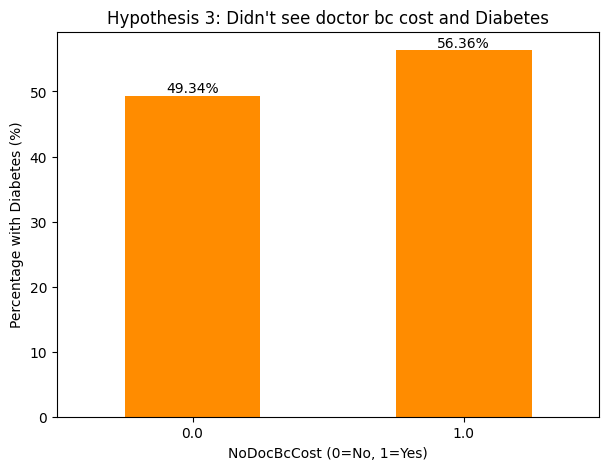

In [203]:
# H3: NoDocBcCost vs Diabetes
plt.figure(figsize=(7,5))
diabetes_rate = df_brfss.groupby('nodocbccost')['diabetes_binary'].mean() * 100

ax = diabetes_rate.plot(kind='bar', color="darkorange")
plt.title("Hypothesis 3: Didn't see doctor bc cost and Diabetes")
plt.xlabel("NoDocBcCost (0=No, 1=Yes)")
plt.ylabel("Percentage with Diabetes (%)")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')


plt.show()

<Figure size 1000x600 with 0 Axes>

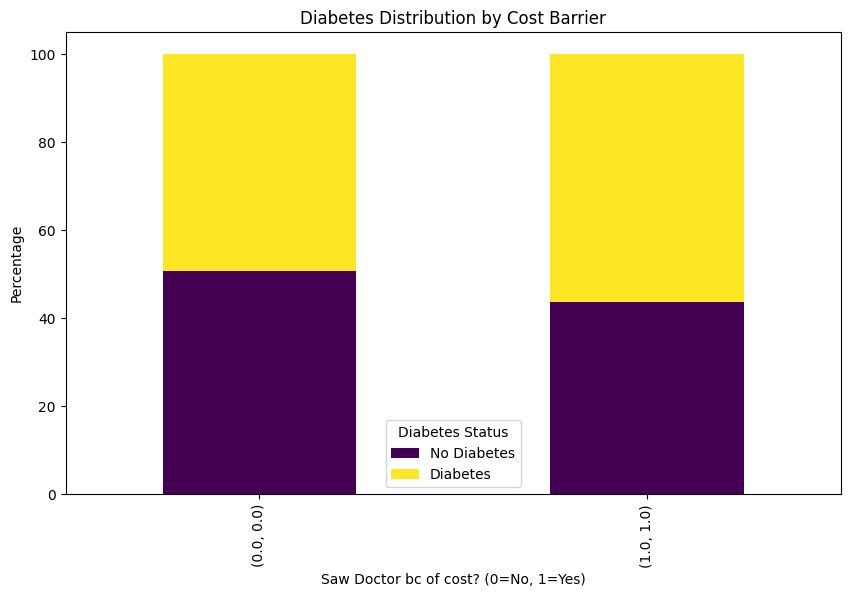

In [204]:
# NoDocBcCost vs Diabetes (Stacked % Bar Plot)
plt.figure(figsize=(10,6))
income_counts = (
    df_brfss.groupby(["nodocbccost", "diabetes_binary"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())  # convert to %
    .unstack()
)

income_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10,6))
plt.title("Diabetes Distribution by Cost Barrier")
plt.ylabel("Percentage")
plt.xlabel("Saw Doctor bc of cost? (0=No, 1=Yes)")
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Diabetes"])
plt.show()

## 2. Interaction

## FINAL: Graph 1  - Coverage & Cost vs Diabetes
- Hypothesis: Limited access to healthcare – due to cost barriers, lack of regular care, or low income – is associated with higher rates of diabetes.
- Rationale: Regular healthcare facilitates early detection and ongoing management of chronic conditions. Barriers to healthcare access may delay diagnosis and/or exacerbate outcomes.

In [ ]:
'''
- This hypothesis is tested using three key variables - 'AnyHealthcare', 'NoDocbcCost', 'Income'. The first two have binary data 1 & 0 representing 'yes/no', income is classified by tiers 1-8.
- Compare diabetes prevalance in people who have healthcare coverage (medical insurance, prepaid plans, etc.) vs people who don't have healthcare coverage.
- Compare diabetes prevalance in people who face cost barriers ("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?") vs people who don't.
- By viewing these graphs side by side, we are able to see trends in healthcare access barriers vs rate of diabetes diagnosis. In order to prove the hypothesis, we expect to see higher diabetes rates
  in people who don't have healthcare and couldn't see a doctor due to cost.
'''

'\n- This hypothesis is examined using three key variables - \'AnyHealthcare\', \'NoDocbcCost\', \'Income\'. The first two have binary data 1 & 0 representing \'yes/no\', income is classified by tiers 1-8.\n- Compare diabetes prevalance in people who have healthcare coverage (medical insurance, prepaid plans, etc.) vs people who don\'t have healthcare coverage.\n- Compare diabetes prevalance in people who face cost barriers ("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?") vs people who don\'t.\n- By viewing these graphs side by side, we are able to see trends in healthcare access barriers vs rate of diabetes diagnosis. In order to prove the hypothesis, we expect to see higher diabetes rates\n  in people who don\'t have healthcare and couldn\'t see a doctor due to cost.\n'

In [259]:
# Calculate coverage vs diabetes rate
coverage_data = df_brfss.groupby('anyhealthcare')['diabetes_binary'].mean() * 100
coverage_counts = df_brfss.groupby('anyhealthcare').size()
coverage_df = pd.DataFrame({
    'Response': coverage_data.index.map({0: ' No', 1: ' Yes'}),
    'Diabetes Rate (%)': coverage_data.values,
    'Count': coverage_counts.values
})

# Calculate cost vs diabetes rate
cost_data = df_brfss.groupby('nodocbccost')['diabetes_binary'].mean() * 100
cost_counts = df_brfss.groupby('nodocbccost').size()
cost_df = pd.DataFrame({
    'Response': cost_data.index.map({0: ' No', 1: ' Yes'}),
    'Diabetes Rate (%)': cost_data.values,
    'Count': cost_counts.values
})

# Create subplots for both variables
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Any Healthcare Coverage', 'Cost Barrier to Doctor in Past 12 Months'),
    horizontal_spacing=0.15
)

# Separate No and Yes for coverage
coverage_no = coverage_df[coverage_df['Response'] == ' No']
coverage_yes = coverage_df[coverage_df['Response'] == ' Yes']

# Separate No and Yes for cost
cost_no = cost_df[cost_df['Response'] == ' No']
cost_yes = cost_df[cost_df['Response'] == ' Yes']

# Plot coverage bar chart - No
fig.add_trace(go.Bar(
    x=coverage_no['Response'],
    y=coverage_no['Diabetes Rate (%)'],
    name='No',
    marker=dict(
        color="#E8C6AE",
        line=dict(color='white', width=2)
    ),
    text=[f"{val:.1f}%" for val in coverage_no['Diabetes Rate (%)']],
    textposition='outside',
    customdata=coverage_no[['Diabetes Rate (%)', 'Count']],
    hovertemplate='%{x} <br> Diabetes Rate: %{customdata[0]:.1f}% <br> Count = %{customdata[1]:,}<extra></extra>',
    hoverlabel=dict(
        bgcolor="#E8C6AE",
        font=dict(color='white')
    ),
    legendgroup='response',
    showlegend=True,
    unselected=dict(marker=dict(opacity=0.5))
), row=1, col=1)

# Plot coverage bar chart - Yes
fig.add_trace(go.Bar(
    x=coverage_yes['Response'],
    y=coverage_yes['Diabetes Rate (%)'],
    name='Yes',
    marker=dict(
        color="#931A23",
        line=dict(color='white', width=2)
    ),
    text=[f"{val:.1f}%" for val in coverage_yes['Diabetes Rate (%)']],
    textposition='outside',
    customdata=coverage_yes[['Diabetes Rate (%)', 'Count']],
    hovertemplate='%{x} <br> Diabetes Rate: %{customdata[0]:.1f}% <br> Count = %{customdata[1]:,}<extra></extra>',
    hoverlabel=dict(
        bgcolor="#931A23",
        font=dict(color='white')
    ),
    legendgroup='response',
    showlegend=True,
    unselected=dict(marker=dict(opacity=0.5))
), row=1, col=1)

# Plot cost bar chart - No
fig.add_trace(go.Bar(
    x=cost_no['Response'],
    y=cost_no['Diabetes Rate (%)'],
    name='No',
    marker=dict(
        color="#E8C6AE",
        line=dict(color='white', width=2)
    ),
    text=[f"{val:.1f}%" for val in cost_no['Diabetes Rate (%)']],
    textposition='outside',
    customdata=cost_no[['Diabetes Rate (%)', 'Count']],
    hovertemplate='%{x} <br> Diabetes Rate: %{customdata[0]:.1f}% <br> Count = %{customdata[1]:,}<extra></extra>',
    hoverlabel=dict(
        bgcolor="#E8C6AE",
        font=dict(color='white')
    ),
    legendgroup='response',
    showlegend=False,
    unselected=dict(marker=dict(opacity=0.5))
), row=1, col=2)

# Plot cost bar chart - Yes
fig.add_trace(go.Bar(
    x=cost_yes['Response'],
    y=cost_yes['Diabetes Rate (%)'],
    name='Yes',
    marker=dict(
        color="#931A23",
        line=dict(color='white', width=2)
    ),
    text=[f"{val:.1f}%" for val in cost_yes['Diabetes Rate (%)']],
    textposition='outside',
    customdata=cost_yes[['Diabetes Rate (%)', 'Count']],
    hovertemplate='%{x} <br> Diabetes Rate: %{customdata[0]:.1f}% <br> Count = %{customdata[1]:,}<extra></extra>',
    hoverlabel=dict(
        bgcolor="#931A23",
        font=dict(color='white')
    ),
    legendgroup='response',
    showlegend=False,
    unselected=dict(marker=dict(opacity=0.5))
), row=1, col=2)

# Update layout
fig.update_xaxes(title_text="Response", row=1, col=1, showgrid=False)
fig.update_xaxes(title_text="Response", row=1, col=2, showgrid=False)
fig.update_yaxes(title_text="Diabetes Rate (%)", row=1, col=1, showgrid=False)
fig.update_yaxes(title_text="Diabetes Rate (%)", row=1, col=2, showgrid=False)

fig.update_layout(
    title_text='Diabetes Rate by Healthcare Access Barriers',
    title_x=0.5,
    height=600,
    legend=dict(
        title='Response',
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='right',
        x=1.08
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='closest',
    dragmode='select',
    clickmode='event+select'
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=False)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=False)

fig.show()

## Final Graph 2 - Income vs Diabetes Rate

In [207]:
'''
- Compare diabetes prevalence at each income group
- Compare coverage ownership at each income
- By viewing these graphs side by side, we are able to see trends in income level vs diabetes prevalence and coverage ownership. In order to prove hypothesis, diabetes rate and lack of coverage ownership
  should decrease as income level increases.
'''

'\n- Compare diabetes prevalence at each income group\n- Compare coverage ownership at each income\n- By viewing these graphs side by side, we are able to see trends in income level vs diabetes prevalence and coverage ownership. In order to prove hypothesis, diabetes rate and lack of coverage ownership\n  should decrease as income level increases.\n'

In [231]:
# INCOME 
income_data = df_brfss.groupby('income')['diabetes_binary'].mean() * 100
income_counts = df_brfss.groupby('income').size()
income_df = pd.DataFrame({
    'Income Group ($)': income_data.index.map({1: ' < $10000', 2: ' $10000 - $15000', 3: ' $15000 - $20000', 4: ' $20000 - $25000', 5: ' $25000 - $35000',
                                               6: ' $35000 - $50000', 7: ' $50000 - $75000', 8: ' $75000 >'}),
    'Diabetes Rate (%)': income_data.values,
    'Count': income_counts.values
})

# Create Plotly line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=income_df['Income Group ($)'],
    y=income_df['Diabetes Rate (%)'],
    mode='lines+markers',
    line=dict(color='#931A23', width=3),
    marker=dict(size=10, color='white', line=dict(color='#A64A47', width=2)),
    customdata=income_df[['Income Group ($)', 'Diabetes Rate (%)', 'Count']],
    hovertemplate='Income: %{customdata[0]}<br>Diabetes Rate (%): %{customdata[1]:.1f}<br>Count: %{customdata[2]:,}<extra></extra>'
))

fig.update_layout(
    title=dict(
        text='Diabetes Rate by Income Group',
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Income Group',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        tickmode='linear',
        tick0=1,
        dtick=1
    ),
    yaxis=dict(
        title='Diabetes Rate (%)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    height=500,
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white",
        font_color="black",
        bordercolor="gray"
    )
)

fig.show()

##  Graph 3 - Rate of coverage ownership by income group

In [232]:
# no coverage vs income
no_coverage = df_brfss[df_brfss['anyhealthcare'] == 0]
coverageincome_data = (
    no_coverage.groupby('income').size() / 
    df_brfss.groupby('income').size() * 100
)
total_counts = df_brfss.groupby('income').size()
no_coverage_counts = no_coverage.groupby('income').size()

coverageincome_df = pd.DataFrame({
    'Income Group ($)': income_data.index.map({1: ' < $10000', 2: ' $10000 - $15000', 3: ' $15000 - $20000', 4: ' $20000 - $25000', 5: ' $25000 - $35000',
                                               6: ' $35000 - $50000', 7: ' $50000 - $75000', 8: ' $75000 >'}),
    'Persons Lacking Coverage (%)': coverageincome_data.values,
    'Total Count': total_counts.values,
    'No Coverage Count': no_coverage_counts.values
})

# Create Plotly line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=coverageincome_df['Income Group ($)'],
    y=coverageincome_df['Persons Lacking Coverage (%)'],
    mode='lines+markers',
    line=dict(color='#E8C6AE', width=3),
    marker=dict(size=10, color='white', line=dict(color='#E8C6AE', width=2)),
    customdata=coverageincome_df[['Income Group ($)', 'Persons Lacking Coverage (%)', 'No Coverage Count', 'Total Count']],
    hovertemplate='Income: %{customdata[0]}<br>Persons Lacking Coverage (%): %{customdata[1]:.1f}<br>No Coverage: %{customdata[2]:,}<br>Total: %{customdata[3]:,}<extra></extra>'
))

fig.update_layout(
    title=dict(
        text='Lack of Coverage at each Income Group',
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Income Group',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        tickmode='linear',
        tick0=1,
        dtick=1
    ),
    yaxis=dict(
        title='Persons Lacking Coverage (%)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    height=500,
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='closest',
    hoverlabel=dict(
        bgcolor="white",
        font_color="black",
        bordercolor="gray"
    )
)

fig.show()

## FINAL: Graph 4 - Diabetes vs No. of Access Barriers

In [210]:
'''
- From the dataset, calculate the number of access barriers (anyhealthcare, nodocbccost) each person has - 0, 1 or 2
- Compare diabetes prevalence at each number using a donut chart
- In order to prove hypo, we need to see higher diabetes prevalence at higher number of barriers. However, we see small difference, meaning we reject this hypo. 
'''

'\n- From the dataset, calculate the number of access barriers (anyhealthcare, nodocbccost) each person has - 0, 1 or 2\n- Compare diabetes prevalence at each number using a donut chart\n- In order to prove hypo, we need to see higher diabetes prevalence at higher number of barriers. However, we see small difference, meaning we reject this hypo. \n'

In [211]:
# Create access barrier variable (0, 1, or 2 barriers)
df_brfss['access_barriers'] = 0
df_brfss.loc[df_brfss['anyhealthcare'] == 0, 'access_barriers'] += 1
df_brfss.loc[df_brfss['nodocbccost'] == 1, 'access_barriers'] += 1

print(df_brfss['access_barriers'].value_counts())

access_barriers
0    62116
1     7329
2     1247
Name: count, dtype: int64


In [212]:
# Calculate diabetes rate for each barrier level
barrier_data = df_brfss.groupby('access_barriers')['diabetes_binary'].mean() * 100
barrier_df = pd.DataFrame({
    'Access Barriers': barrier_data.index.map({
        0: '0 Barriers',
        1: '1 Barrier',
        2: '2 Barriers'
    }),
    'Diabetes Rate (%)': barrier_data.values
})

In [230]:
# Create donut chart
barrier_df['Access Barriers'] = pd.Categorical(
    barrier_df['Access Barriers'],
    categories=['0 Barriers', '1 Barrier', '2 Barriers'],
    ordered=True
)
barrier_df = barrier_df.sort_values('Access Barriers')

fig = go.Figure(data=[go.Pie(
    labels=barrier_df['Access Barriers'],
    values=barrier_df['Diabetes Rate (%)'],
    hole=0.33,
    marker=dict(
        colors=['#931A23', '#E8C6AE', '#DD9C7C'],
        line=dict(color='white', width=2)
    ),
    text=[f"{val:.2f}%" for val in barrier_df['Diabetes Rate (%)']],
    textinfo='label+text',
    textposition='inside',
    textfont=dict(size=14, color='white', family='Arial', weight='bold'),
    hovertemplate='<b>%{label}</b><br>Diabetes Rate: %{value:.2f}%<extra></extra>',
    sort=False
)])

fig.update_layout(
    title=dict(
        text='Diabetes Rate by Number of Healthcare Access Barriers',
        x=0.45,
        xanchor='center'
    ),
    width=700,
    height=700,
    showlegend=True,
    legend=dict(
        title='Healthcare Access Barriers',
        orientation='v',
        yanchor='middle',
        y=0.5,
        xanchor='left',
        x=1.02
    ),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

# H5: Do Existing Conditions Predict Diabetes?
Accept

## EDA

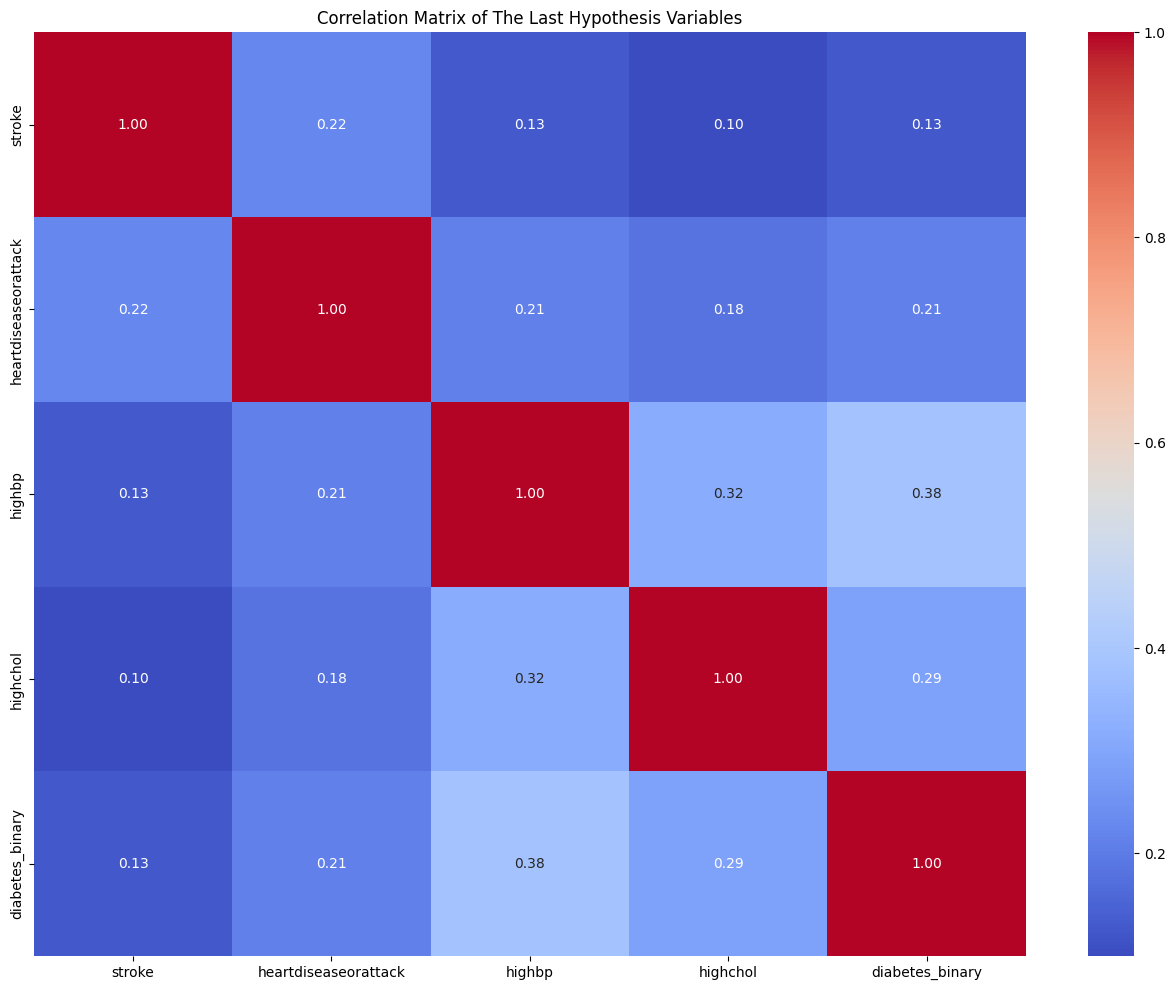

In [214]:
# The needed columns for the first hypothesis
hypo5_cols = ["stroke","heartdiseaseorattack","highbp","highchol","diabetes_binary"]

# Calculate the correlation matrix for the first hypothesis
correlation_matrix1 = df_brfss[hypo5_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of The Last Hypothesis Variables')
plt.show()

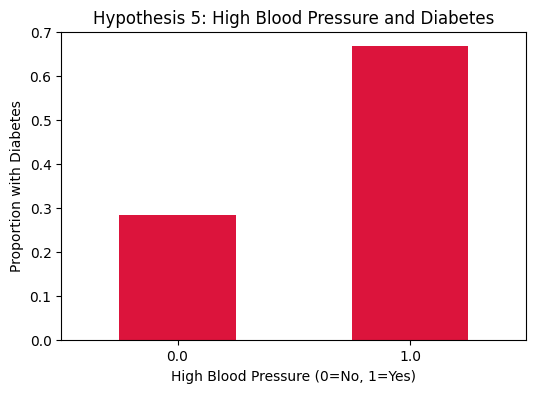

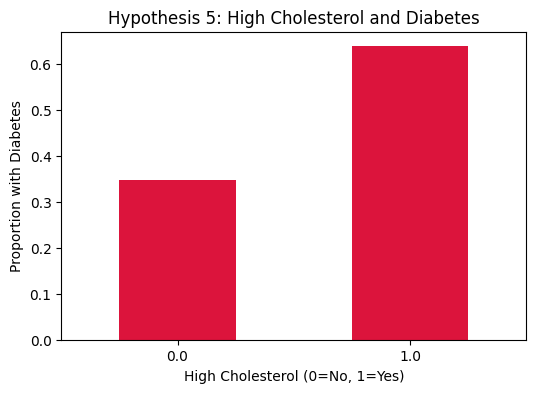

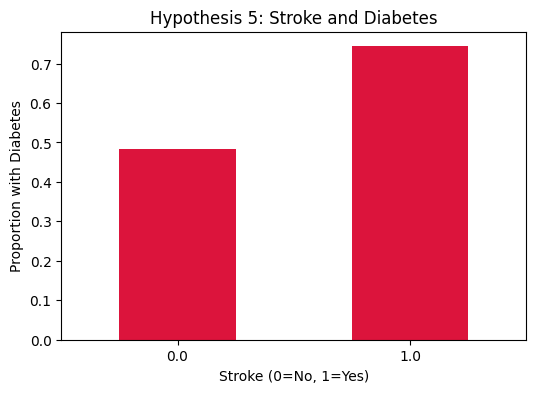

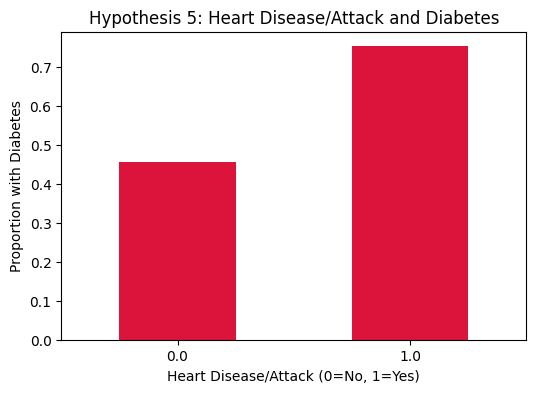

<Figure size 600x400 with 0 Axes>

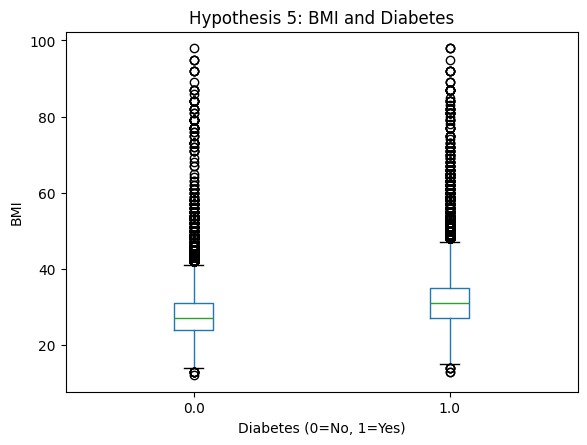

In [215]:
# H5: Existing Conditions vs Diabetes

conditions = {
    "High Blood Pressure": "highbp",
    "High Cholesterol": "highchol",
    "Stroke": "stroke",
    "Heart Disease/Attack": "heartdiseaseorattack"
}

# Bar charts for categorical existing conditions
for label, col in conditions.items():
    plt.figure(figsize=(6,4))
    df_brfss.groupby(col)['diabetes_binary'].mean().plot(kind='bar', color="crimson")
    plt.title(f"Hypothesis 5: {label} and Diabetes")
    plt.xlabel(f"{label} (0=No, 1=Yes)")
    plt.ylabel("Proportion with Diabetes")
    plt.xticks(rotation=0)
    plt.show()

# Boxplot for BMI vs Diabetes
plt.figure(figsize=(6,4))
df_brfss.boxplot(column='bmi', by='diabetes_binary', grid=False)
plt.title("Hypothesis 5: BMI and Diabetes")
plt.suptitle("")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("BMI")
plt.show()


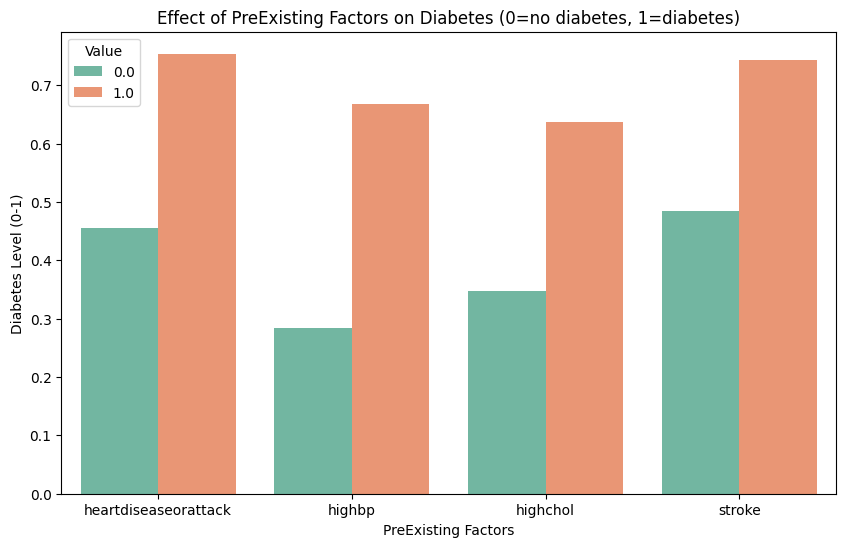

In [216]:
# Melt the variables into one column for easier plotting
df_melted = df_brfss.melt(
    id_vars='diabetes_binary',
    value_vars= ["stroke","heartdiseaseorattack","highbp","highchol"],
    var_name='PreExistingFactors',
    value_name='Value'
)

# Calculate mean diabetes value for each category of lifestyle factor
df_grouped = df_melted.groupby(['PreExistingFactors','Value'])['diabetes_binary'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_grouped,
    x='PreExistingFactors',
    y='diabetes_binary',
    hue='Value',
    palette='Set2'
)

plt.title("Effect of PreExisting Factors on Diabetes (0=no diabetes, 1=diabetes)")
plt.ylabel("Diabetes Level (0-1)")
plt.xlabel("PreExisting Factors")
plt.show()

## Final Graph 1: Correlation between pre-existing health conditions and diabetes

In [ ]:
'''
- This hypothesis is tested with the following variables - 'stroke', 'heartdiseaseorattack', 'highbp', 'highchol', 'bmi'
- Compare diabetes prevalence in people who have had yes/no 'stroke', 'heartdiseaseorattack', 'highbp', 'highchol'
- To prove the hypo, we expect to see high diabetes prevalence in people who have had those diseases
'''

In [ ]:
# Melt the variables into one column for easier plotting
df_melted = df_brfss.melt(
    id_vars='diabetes_binary',
    value_vars=["stroke", "heartdiseaseorattack", "highbp", "highchol"],
    var_name='PreExistingFactors',
    value_name='Value'
)

df_grouped = df_melted.groupby(['PreExistingFactors', 'Value'])['diabetes_binary'].mean().reset_index()
df_grouped['diabetes_rate_pct'] = df_grouped['diabetes_binary'] * 100
df_grouped['Response'] = df_grouped['Value'].map({0: 'No', 1: 'Yes'})
df_grouped['PreExistingFactors'] = df_grouped['PreExistingFactors'].map({
    'stroke': 'Stroke',
    'heartdiseaseorattack': 'Heart Disease',
    'highbp': 'High Blood Pressure',
    'highchol': 'High Cholesterol'
})

df_no = df_grouped[df_grouped['Response'] == 'No']
df_yes = df_grouped[df_grouped['Response'] == 'Yes']

fig = go.Figure()

# Plot 'No' bars
fig.add_trace(go.Bar(
    x=df_no['PreExistingFactors'],
    y=df_no['diabetes_rate_pct'],
    name='No',
    marker=dict(color='#EEC8A3'),
    text=[f"{val:.1f}" for val in df_no['diabetes_rate_pct']],
    textposition='outside',
    textfont=dict(size=11),
    hovertemplate='<b>%{x}</b><br>Has Condition: No<br>Diabetes Rate (%): %{y:.1f}<extra></extra>',
    selected=dict(marker=dict(opacity=1)),
    unselected=dict(marker=dict(opacity=0.5))
))

# Plot 'Yes' bars
fig.add_trace(go.Bar(
    x=df_yes['PreExistingFactors'],
    y=df_yes['diabetes_rate_pct'],
    name='Yes',
    marker=dict(color='#931A23'),
    text=[f"{val:.1f}" for val in df_yes['diabetes_rate_pct']],
    textposition='outside',
    textfont=dict(size=11),
    hovertemplate='<b>%{x}</b><br>Has Condition: Yes<br>Diabetes Rate (%): %{y:.1f}<extra></extra>',
    selected=dict(marker=dict(opacity=1)),
    unselected=dict(marker=dict(opacity=0.5))
))

# Update layout
fig.update_layout(
    title=dict(
        text='Effect of Pre-Existing Factors on Diabetes Rates',
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Pre-Existing Factors',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black'
    ),
    yaxis=dict(
        title='Diabetes Rate (%)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black'
    ),
    barmode='group',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        title='Has Condition',
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='right',
        x=1.1
    ),
    height = 600,
    hovermode='closest',
    dragmode='select',
    clickmode='event+select'
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=False)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=False)

fig.show()

## Final Graph 2: Correlation between bmi and diabetes

In [ ]:
'''
- Compare diabetes prevalence at each bmi category (note that based on usa categories, classification is different between countries)
- To prove hypo we expect to see higher diabetes prevalence at higher bmi (known fact that chonk = diabetes type 2)
'''

In [218]:
# Create BMI category
df_brfss['bmi_class'] = 0

df_brfss.loc[df_brfss['bmi'] < 18.5, 'bmi_class'] = 0
df_brfss.loc[(df_brfss['bmi'] >= 18.5) & (df_brfss['bmi'] < 25), 'bmi_class'] = 1
df_brfss.loc[(df_brfss['bmi'] >= 25) & (df_brfss['bmi'] < 30), 'bmi_class'] = 2
df_brfss.loc[(df_brfss['bmi'] >= 30) & (df_brfss['bmi'] < 35), 'bmi_class'] = 3
df_brfss.loc[(df_brfss['bmi'] >= 35) & (df_brfss['bmi'] < 40), 'bmi_class'] = 4
df_brfss.loc[(df_brfss['bmi'] >= 40), 'bmi_class'] = 5

print(df_brfss['bmi_class'].value_counts())

bmi_class
2    24135
3    17301
1    14460
4     8112
5     6031
0      653
Name: count, dtype: int64


In [ ]:
# BMI data
bmi_data = df_brfss.groupby('bmi_class')['diabetes_binary'].mean() * 100
bmi_counts = df_brfss.groupby('bmi_class').size()

bmi_df = pd.DataFrame({
    'Category': bmi_data.index.map({
        0: 'Underweight (<18.5)', 
        1: 'Healthy (18.5-25)', 
        2: 'Overweight (25-30)', 
        3: 'Class 1 Obesity (30-35)', 
        4: 'Class 2 Obesity (35-40)', 
        5: 'Class 3 Obesity (>40)'
    }),
    'Diabetes Rate (%)': bmi_data.values,
    'Count': bmi_counts.values
})

category_order = [
    'Underweight (<18.5)', 
    'Healthy (18.5-25)', 
    'Overweight (25-30)', 
    'Class 1 Obesity (30-35)', 
    'Class 2 Obesity (35-40)', 
    'Class 3 Obesity (>40)'
]

bmi_df['Category'] = pd.Categorical(bmi_df['Category'], categories=category_order, ordered=True)
bmi_df = bmi_df.sort_values('Category')

fig = go.Figure()

colors = ["#FFF1A4", '#EEC8A3', '#DD9C7C', '#D24C49', '#A64A47', '#931A23']

for i, (idx, row) in enumerate(bmi_df.iterrows()):
    fig.add_trace(go.Bar(
        x=[row['Category']],
        y=[row['Diabetes Rate (%)']],
        name=row['Category'],
        marker=dict(color=colors[i]),
        text=[f"{row['Diabetes Rate (%)']:.1f}"],
        textposition='outside',
        textfont=dict(size=11),
        customdata=[[row['Category'], row['Diabetes Rate (%)'], row['Count']]],
        hovertemplate='<b>%{customdata[0]}</b><br>Diabetes Rate (%): %{customdata[1]:.1f}<br>Count: %{customdata[2]:,}<extra></extra>',
        showlegend=True,
        selected=dict(marker=dict(opacity=1)),
        unselected=dict(marker=dict(opacity=0.3))
    ))

# Update layout
fig.update_layout(
    title=dict(
        text='Diabetes Rate by BMI Category',
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Adult BMI Categories (USA)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black',
        tickangle=0,
        categoryorder='array',
        categoryarray=category_order
    ),
    yaxis=dict(
        title='Diabetes Rate (%)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black'
    ),
    height=700,
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='closest',
    dragmode='select',
    clickmode='event+select',
    legend=dict(
        title='BMI Category',
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02
    )
)

fig.show()

## Final Graph 3: Correlation between no. of pmhx and diabetes - choose circle or bar

In [ ]:
'''
- Compare diabetes prevalence vs number of pre-existing conditions 'stroke', 'heartdiseaseorattack', 'highbp', 'highchol', and obesity (bmi > 30)
- To prove hypo we expect to see higher diabetes prevalence with more conditions
- I think don't use donut chart? v hard to see
'''

In [244]:
# Create pmhx variable (0-4 barriers)
df_brfss['Conditions'] = 0
df_brfss.loc[df_brfss['highbp'] == 1, 'Conditions'] += 1
df_brfss.loc[df_brfss['highchol'] == 1, 'Conditions'] += 1
df_brfss.loc[df_brfss['heartdiseaseorattack'] == 1, 'Conditions'] += 1
df_brfss.loc[df_brfss['stroke'] == 1, 'Conditions'] += 1
df_brfss.loc[df_brfss['bmi'] > 30, 'Conditions'] += 1

print(df_brfss['Conditions'].value_counts())

Conditions
2    19564
1    17626
0    14595
3    14091
4     4168
5      648
Name: count, dtype: int64


In [ ]:
# PMHX data
pmhx_data = df_brfss.groupby('Conditions')['diabetes_binary'].mean() * 100
pmhx_counts = df_brfss.groupby('Conditions').size()

pmhx_df = pd.DataFrame({
    'Conditions': pmhx_data.index.map({
        0: 'No Other Conditions', 
        1: '1 Condition', 
        2: '2 Conditions', 
        3: '3 Conditions', 
        4: '4 Conditions',
        5: '5 Conditions'
    }),
    'Diabetes Rate (%)': pmhx_data.values,
    'Count': pmhx_data.values
})

pmhx_order= [
    'No Other Conditions', 
    '1 Condition', 
    '2 Conditions', 
    '3 Conditions', 
    '4 Conditions',
    '5 Conditions'
]

pmhx_df['Conditions'] = pd.Categorical(pmhx_df['Conditions'], categories=pmhx_order, ordered=True)
pmhx_df = pmhx_df.sort_values('Conditions')

fig = go.Figure()

# Add bars with different colors for each category
colors = ["#FFF1A4", '#EEC8A3', '#DD9C7C', '#D24C49', '#A64A47', '#931A23']

for i, (idx, row) in enumerate(pmhx_df.iterrows()):
    fig.add_trace(go.Bar(
        x=[row['Conditions']],
        y=[row['Diabetes Rate (%)']],
        name=row['Conditions'],
        marker=dict(color=colors[i]),
        text=[f"{row['Diabetes Rate (%)']:.1f}"],
        textposition='outside',
        textfont=dict(size=11),
        customdata=[[row['Conditions'], row['Diabetes Rate (%)'], row['Count']]],
        hovertemplate='<b>%{customdata[0]}</b><br>Diabetes Rate (%): %{customdata[1]:.1f}<br>Count: %{customdata[2]:,}<extra></extra>',
        showlegend=True,
        selected=dict(marker=dict(opacity=1)),
        unselected=dict(marker=dict(opacity=0.3))
    ))

# Update layout
fig.update_layout(
    title=dict(
        text='Diabetes Rate by No. of Pre-Existing Conditions',
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='No. of Pre-Existing Conditions<br>(Heart Disease, High Blood Pressure, High Cholesterol, Stroke, Obesity)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black',
        tickangle=0,
        categoryorder='array',
        categoryarray=category_order
    ),
    yaxis=dict(
        title='Diabetes Rate (%)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black'
    ),
    height=500,
    plot_bgcolor='white',
    paper_bgcolor='white',
    hovermode='closest',
    dragmode='select',
    clickmode='event+select',
    legend=dict(
        title='Number of Conditions',
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02
    )
)

fig.show()

In [ ]:
# PMHX data
pmhx_data = df_brfss.groupby('Conditions')['diabetes_binary'].mean() * 100
pmhx_counts = df_brfss.groupby('Conditions').size()

pmhx_df = pd.DataFrame({
    'Conditions': pmhx_data.index.map({
        0: 'No Other Conditions', 
        1: '1 Condition', 
        2: '2 Conditions', 
        3: '3 Conditions', 
        4: '4 Conditions',
        5: '5 Conditions'
    }),
    'Diabetes Rate (%)': pmhx_data.values,
    'Count': pmhx_data.values
})

pmhx_order= [
    'No Other Conditions', 
    '1 Condition', 
    '2 Conditions', 
    '3 Conditions', 
    '4 Conditions',
    '5 Conditions'
]

pmhx_df['Conditions'] = pd.Categorical(pmhx_df['Conditions'], categories=pmhx_order, ordered=True)
pmhx_df = pmhx_df.sort_values('Conditions')

fig = go.Figure(data=[go.Pie(
    labels=pmhx_df['Conditions'],
    values=pmhx_df['Diabetes Rate (%)'],
    hole=0.33,
    marker=dict(
        colors=["#FBE35A", '#EEC8A3', '#DD9C7C', '#D24C49', '#A64A47', '#931A23'],
        line=dict(color='white', width=2)
    ),
    text=[f"{val:.2f}%" for val in pmhx_df['Diabetes Rate (%)']],
    textinfo='label+text',
    textposition='inside',
    textfont=dict(size=14, color='white', family='Arial', weight='bold'),
    hovertemplate='<b>%{label}</b><br>Diabetes Rate: %{value:.2f}%<extra></extra>',
    sort=False
)])

fig.update_layout(
    title=dict(
        text='Diabetes Rate by Number of Pre-Existing Conditions',
        x=0.45,
        xanchor='center'
    ),
    width=700,
    height=700,
    showlegend=True,
    legend=dict(
        title='Number of Conditions',
        orientation='v',
        yanchor='middle',
        y=0.5,
        xanchor='left',
        x=1.02
    ),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

## Final Graph 4: Correlation between age, no. of pmhx and diabetes

In [ ]:
'''
- based on figma, age wasn't part of the hypo in assignment 1
- i think we can add this in as like a bonus graph? say altho age isn't a pre-existing condition, we thought it would be interesting to see if diabetes rate increase with age smth smth
'''

In [273]:
# Create yes/no conditions variable (0-1 no yes)
df_brfss['conditions_binary'] = 0
df_brfss.loc[df_brfss['Conditions'] > 0, 'conditions_binary'] += 1

print(df_brfss['conditions_binary'].value_counts())

conditions_binary
1    56097
0    14595
Name: count, dtype: int64


In [277]:
# Create age groups
df_brfss['age_group'] = pd.cut(
    df_brfss['age'], 
    bins=[0, 3, 6, 9, 12, 13],
    labels=['18-34', '35-49', '50-64', '65-79', '80+'],
    include_lowest=True
)

print(df_brfss['age_group'].value_counts())

age_group
50-64    25587
65-79    24294
35-49    10961
80+       5426
18-34     4424
Name: count, dtype: int64


In [ ]:
# Group by age_group and conditions_binary, calculate diabetes rate
age_conditions_grouped = df_brfss.groupby(['age_group', 'conditions_binary'], observed=True)['diabetes_binary'].mean().reset_index()
age_conditions_grouped['diabetes_rate_pct'] = age_conditions_grouped['diabetes_binary'] * 100
age_conditions_grouped['Response'] = age_conditions_grouped['conditions_binary'].map({0: 'No', 1: 'Yes'})

# Get counts for hover
age_conditions_counts = df_brfss.groupby(['age_group', 'conditions_binary'], observed=True).size().reset_index(name='Count')
age_conditions_grouped = age_conditions_grouped.merge(age_conditions_counts, on=['age_group', 'conditions_binary'])

# Separate No and Yes conditions
df_no = age_conditions_grouped[age_conditions_grouped['Response'] == 'No']
df_yes = age_conditions_grouped[age_conditions_grouped['Response'] == 'Yes']

# Create figure
fig = go.Figure()

# Plot 'No' bars (No pre-existing conditions)
fig.add_trace(go.Bar(
    x=df_no['age_group'].astype(str),
    y=df_no['diabetes_rate_pct'],
    name='No Pre-Existing Conditions',
    marker=dict(color='#EEC8A3'),
    text=[f"{val:.1f}" for val in df_no['diabetes_rate_pct']],
    textposition='outside',
    textfont=dict(size=11),
    customdata=df_no[['Count']],
    hovertemplate='<b>%{x}</b><br>Has Pre-Existing Conditions: No<br>Diabetes Rate (%): %{y:.1f}<br>Count: %{customdata[0]:,}<extra></extra>',
    selected=dict(marker=dict(opacity=1)),
    unselected=dict(marker=dict(opacity=0.5))
))

# Plot 'Yes' bars (Has pre-existing conditions)
fig.add_trace(go.Bar(
    x=df_yes['age_group'].astype(str),
    y=df_yes['diabetes_rate_pct'],
    name='Has Pre-Existing Conditions',
    marker=dict(color='#931A23'),
    text=[f"{val:.1f}" for val in df_yes['diabetes_rate_pct']],
    textposition='outside',
    textfont=dict(size=11),
    customdata=df_yes[['Count']],
    hovertemplate='<b>%{x}</b><br>Has Pre-Existing Conditions: Yes<br>Diabetes Rate (%): %{y:.1f}<br>Count: %{customdata[0]:,}<extra></extra>',
    selected=dict(marker=dict(opacity=1)),
    unselected=dict(marker=dict(opacity=0.5))
))

# Update layout
fig.update_layout(
    title=dict(
        text='Diabetes Rate by Age Group and Pre-Existing Conditions',
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title='Age Group (Years)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black'
    ),
    yaxis=dict(
        title='Diabetes Rate (%)',
        showgrid=False,
        showline=True,
        linewidth=1,
        linecolor='black',
        ticks='outside',
        ticklen=5,
        tickwidth=1,
        tickcolor='black'
    ),
    barmode='group',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        title='Pre-Existing Conditions',
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='right',
        x=1.15
    ),
    height=600,
    hovermode='closest',
    dragmode='select',
    clickmode='event+select'
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=False)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=False)

fig.show()